In [1]:
import sys
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from celluloid import Camera

In [2]:
observable_distribution_file = '../../Baptistina/fam-298-132-p7.list'
synthetic_distributions = '../../Baptistina/proper_elements/v2'

In [3]:
observables = {}
with open(observable_distribution_file) as f:
    for line in f.readlines():
        row = line.split()
        a_num = int(row[1])
        a = float(row[2])
        e = float(row[3])
        i = np.arcsin(float(row[4]))
        size = float(row[5])
        observables[a_num] = {'size':size, 'a':a, 'e':e, 'i':i}


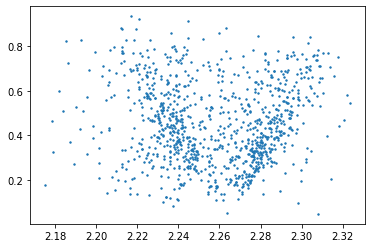

In [4]:
plt.scatter([observables[key]['a'] for key in observables], [1/observables[key]['size'] for key in observables], s=2)

In [5]:
[f for f in Path(synthetic_distributions).iterdir()]

[PosixPath('../../Baptistina/proper_elements/v2/280Myr_Baps.txt'),
 PosixPath('../../Baptistina/proper_elements/v2/190Myr_Baps.txt'),
 PosixPath('../../Baptistina/proper_elements/v2/290Myr_Baps.txt'),
 PosixPath('../../Baptistina/proper_elements/v2/180Myr_Baps.txt'),
 PosixPath('../../Baptistina/proper_elements/v2/150Myr_Baps.txt'),
 PosixPath('../../Baptistina/proper_elements/v2/400Myr_Baps.txt'),
 PosixPath('../../Baptistina/proper_elements/v2/120Myr_Baps.txt'),
 PosixPath('../../Baptistina/proper_elements/v2/360Myr_Baps.txt'),
 PosixPath('../../Baptistina/proper_elements/v2/310Myr_Baps.txt'),
 PosixPath('../../Baptistina/proper_elements/v2/60Myr_Baps.txt'),
 PosixPath('../../Baptistina/proper_elements/v2/10Myr_Baps.txt'),
 PosixPath('../../Baptistina/proper_elements/v2/240Myr_Baps.txt'),
 PosixPath('../../Baptistina/proper_elements/v2/230Myr_Baps.txt'),
 PosixPath('../../Baptistina/proper_elements/v2/130Myr_Baps.txt'),
 PosixPath('../../Baptistina/proper_elements/v2/140Myr_Baps.txt'

In [6]:
synthetic_files = [f for f in Path(synthetic_distributions).iterdir()]


synthetic_data = {}
for fpath in synthetic_files:
    with open(fpath) as f:
        year = int(fpath.stem[:-8])
        synthetic_data[year] = {}
        for line in f.readlines():
            row = line.split('\t')
            key = row[0]
            size = float(key[:-2])
            a = float(row[1])
            e = float(row[2])
            i = float(row[3])
            synthetic_data[year][key] = {'size':size, 'a':a, 'e':e, 'i':i}

In [7]:
years = list(synthetic_data.keys())
years.sort()
years = years[:]

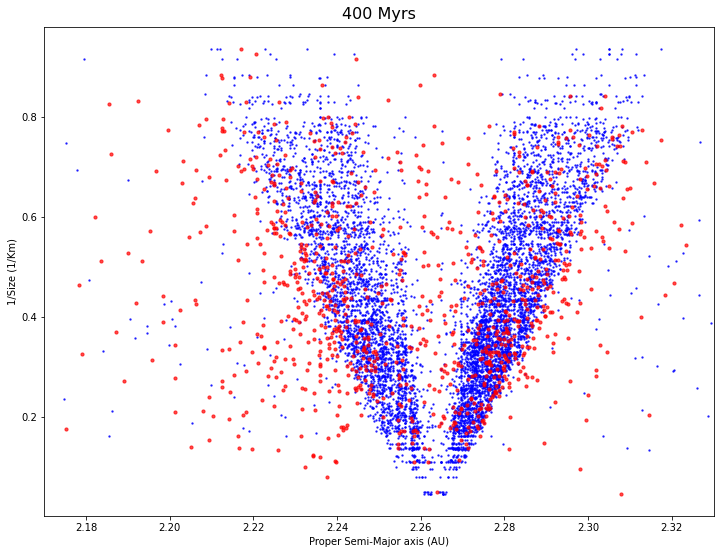

In [8]:
fig = plt.figure(figsize=(12, 9))
camera = Camera(fig)
for year in years:
    data = synthetic_data[year]
    plt.scatter([data[key]['a'] for key in data], [1/data[key]['size'] for key in data], s=2, alpha=.7, c='blue')
    plt.scatter([observables[key]['a'] for key in observables], [1/observables[key]['size'] for key in observables], s=10, alpha=.7, c='red')
    plt.text(0.5, 1.01,'{} Myrs'.format(year), ha="center",va="bottom", fontsize=16, transform = plt.gca().transAxes)
    plt.xlabel('Proper Semi-Major axis (AU)')
    plt.ylabel('1/Size (1/Km)')
    plt.xlim(2.17, 2.33)
    camera.snap()
animation = camera.animate(blit=True)
animation.save("../figures/v2_AvsSize_baps.gif", writer = 'pillow', dpi=300)

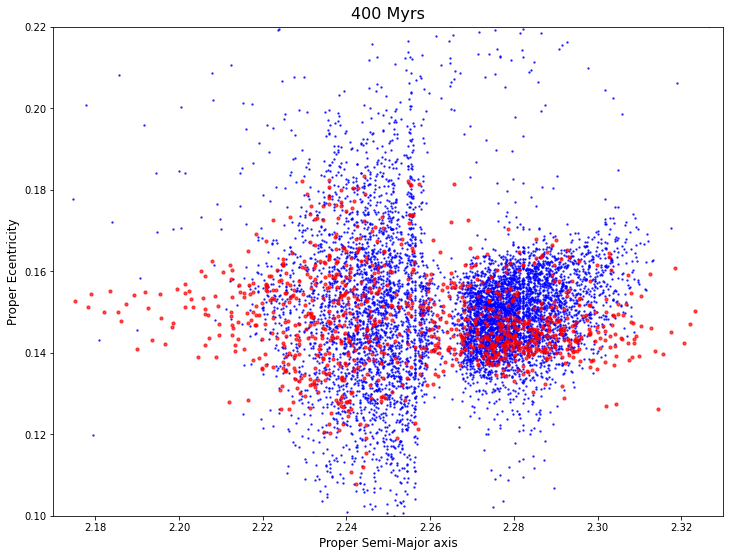

In [31]:
fig = plt.figure(figsize=(12, 9))
camera = Camera(fig)
for year in years:
    data = synthetic_data[year]
    plt.scatter([data[key]['a'] for key in data], [data[key]['e'] for key in data], s=2, alpha=.7, c='blue')
    plt.scatter([observables[key]['a'] for key in observables], [observables[key]['e'] for key in observables], s=10, alpha=.7, c='red')
    plt.text(0.5, 1.01,'{} Myrs'.format(year), ha="center",va="bottom", fontsize=16, transform = plt.gca().transAxes)
    plt.xlabel('Proper Semi-Major axis', fontsize = 12)
    plt.ylabel('Proper Ecentricity', fontsize = 12)
    plt.xlim(2.17, 2.33)
    plt.ylim(0.10, 0.22)
    camera.snap()

animation = camera.animate(blit=True)
animation.save("../figures/v2_AvsE_baps.gif", writer = 'pillow', dpi=300)

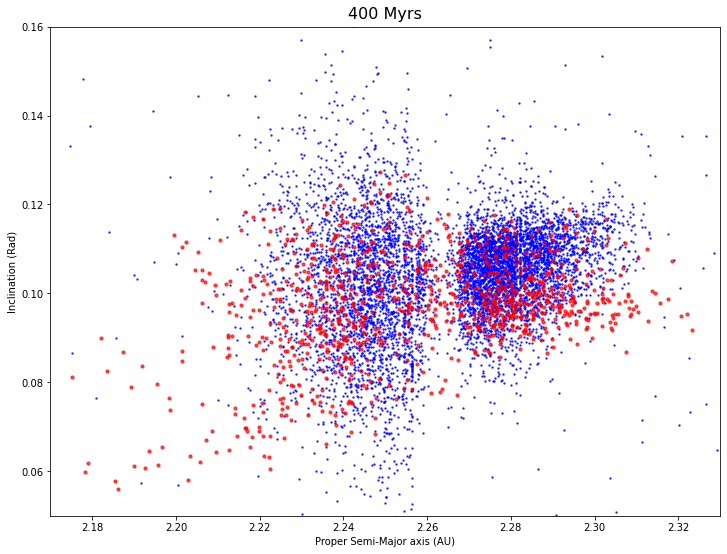

In [32]:
fig = plt.figure(figsize=(12, 9))
camera = Camera(fig)
for year in years:
    data = synthetic_data[year]
    plt.scatter([data[key]['a'] for key in data], [data[key]['i'] for key in data], s=2, alpha=.7, c='blue')
    plt.scatter([observables[key]['a'] for key in observables], [observables[key]['i'] for key in observables], s=10, alpha=.7, c='red')
    plt.text(0.5, 1.01,'{} Myrs'.format(year), ha="center",va="bottom", fontsize=16, transform = plt.gca().transAxes)
    plt.xlabel('Proper Semi-Major axis (AU)')
    plt.ylabel('Inclination (Rad)')
    plt.ylim(0.05, 0.16)
    plt.xlim(2.17, 2.33)
    camera.snap()
animation = camera.animate(blit=True)
animation.save("../figures/v2_AvsI_baps.gif", writer = 'pillow', dpi=300)

In [9]:
from pygifsicle import optimize
# optimize('/Users/bethclark/Projects/Flora_Family/figures/v2_AvsE_baps.gif')
# optimize('/Users/bethclark/Projects/Flora_Family/figures/v2_AvsI_baps.gif')
optimize('/Users/bethclark/Projects/Flora_Family/figures/v2_AvsSize_baps.gif')
